#Defining problem statement:
Due to heavy competition in the market, an E commerce company is facing problem of account churning, resulting in losing lots of customers as they have multiple customers related to one account.
They approached us to develop a model for churn prediction and also provide campaign recommendations to them, so they can offer potential customers some segmented offers.
They want our recommendation to be unique and precise as not to make loss for the company.
#Need for the study/project:
This study can help them in retaining churning customers, what are the reasons for churn like is there any problem with their product quality, Customer service, offers they are providing.
They can improve their product quality by following the recommendations made, improving their customer service programs and also providing best offers for their best customers.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Customer Churn Data.xlsx")
df=pd.read_excel(path,"Data for DSBA")

In [ ]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [ ]:
df.shape

(11260, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

Churn is the target variable and other 18 variables are dependent variables which are used for defining target variable.
#Assumptions made:

* Service_score has values from 0 to 5, where 0 being the least and 5 being the highest score for company’s service provided to the account holders.*   List item
* Cc_Agent_score has values from 1 to 5, where 1 being the least and 5 being the highest score for company’s customer care service provided to the account holders.
*Currency is assumed to be in Rupee.
*In the variable account_segment, HNI means the account holders who brings high revenue followed by Super plus, Super, Regular plus and regular being the account holder who brings less revenue.
*Variable City_tier has values from 1 to 3, 1 being the highest valued and 3 being the least.
*In account segment variable, HNI is high valued account type followed by Super plus, Super, Regular plus and Regular.
*Account holders are primary customer of the account.


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop("AccountID",axis=1,inplace=True)

In [ ]:
df["Churn"].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [ ]:
df["Tenure"].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [ ]:
df["City_Tier"].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [ ]:
df["CC_Contacted_LY"].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

In [ ]:
df["Payment"].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [ ]:
df["Service_Score"].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [ ]:
df["Account_user_count"].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [ ]:
df["account_segment"].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [ ]:
df["CC_Agent_Score"].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [ ]:
df["rev_per_month"].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [ ]:
df["Complain_ly"].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [ ]:
df["rev_growth_yoy"].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [ ]:
df["coupon_used_for_payment"].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [ ]:
df["Day_Since_CC_connect"].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [ ]:
df["cashback"].value_counts()

155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [ ]:
df["Login_device"].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [ ]:
df["Tenure"]=df["Tenure"].replace("#",np.nan)
df["Gender"]=df["Gender"].replace("Male","M")
df["Gender"]=df["Gender"].replace("Female","F")
df["Account_user_count"]=df["Account_user_count"].replace("@",np.nan)
df["account_segment"]=df["account_segment"].replace("Regular +","Regular Plus")
df["account_segment"]=df["account_segment"].replace("Super +","Super Plus")
df["rev_per_month"]=df["rev_per_month"].replace("+",np.nan)
df["rev_growth_yoy"]=df["rev_growth_yoy"].replace("$",np.nan)
df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("#",np.nan)
df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("$",np.nan)
df["coupon_used_for_payment"]=df["coupon_used_for_payment"].replace("*",np.nan)
df["Day_Since_CC_connect"]=df["Day_Since_CC_connect"].replace("$",np.nan)
df["cashback"]=df["cashback"].replace("$",np.nan)
df["Login_device"]=df["Login_device"].replace("&&&&",np.nan)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11257.0,16.193391,3.757721,4.0,13.00,15.00,19.00,28.0


#Univariate analysis

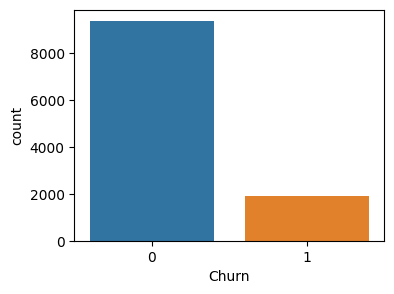

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Churn"]);

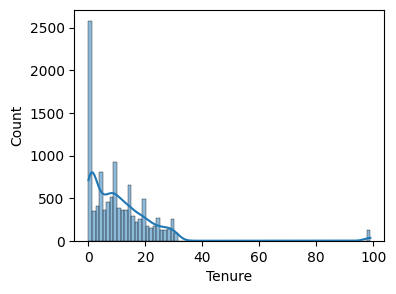

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(x=df["Tenure"],kde=True);

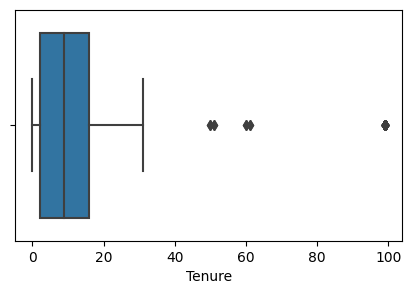

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Tenure"]);

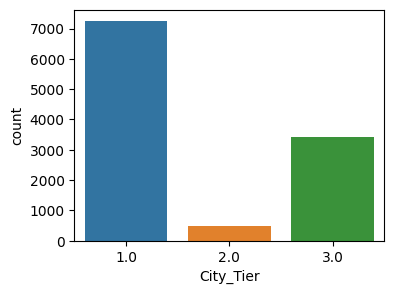

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["City_Tier"]);

In [ ]:
df["City_Tier"].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

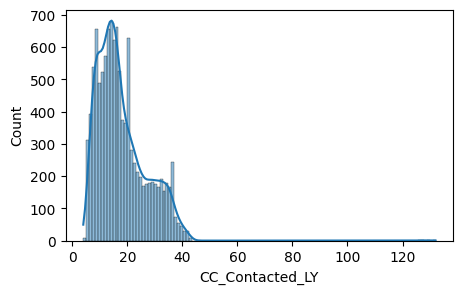

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(x=df["CC_Contacted_LY"],kde=True);

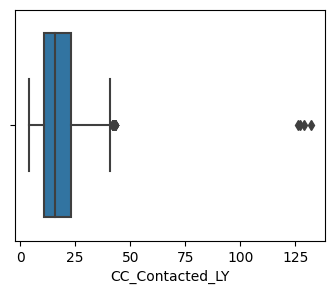

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["CC_Contacted_LY"]);

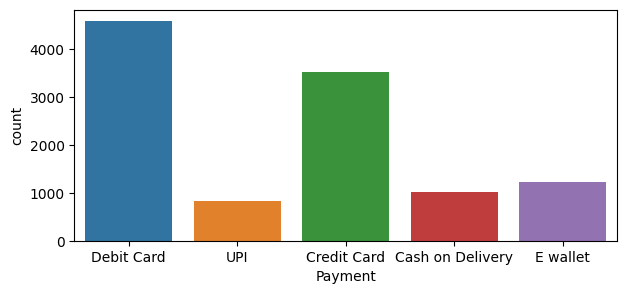

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(x=df["Payment"]);

In [ ]:
df["Payment"].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

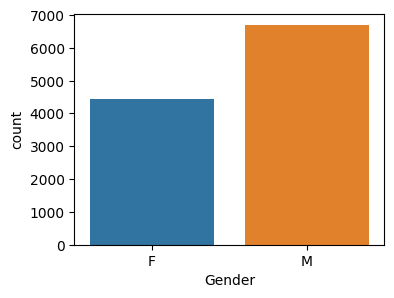

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Gender"]);

In [ ]:
df["Gender"].value_counts()

M    6704
F    4448
Name: Gender, dtype: int64

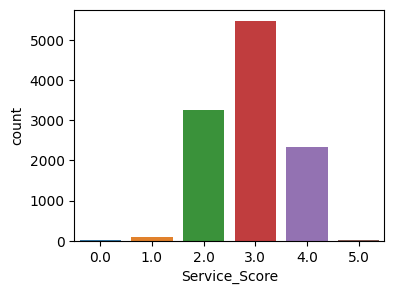

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Service_Score"]);

In [ ]:
df["Service_Score"].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

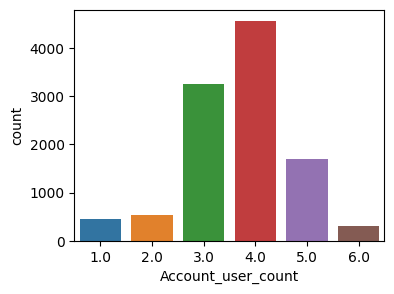

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Account_user_count"]);

In [ ]:
df["Account_user_count"].value_counts()

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

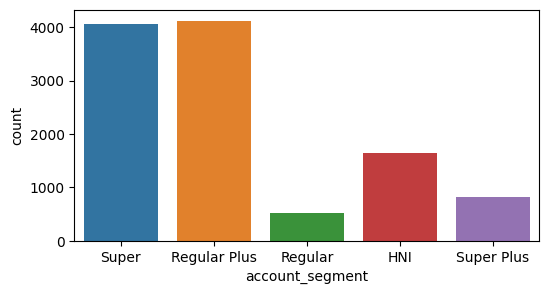

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x=df["account_segment"]);

In [ ]:
df["account_segment"].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

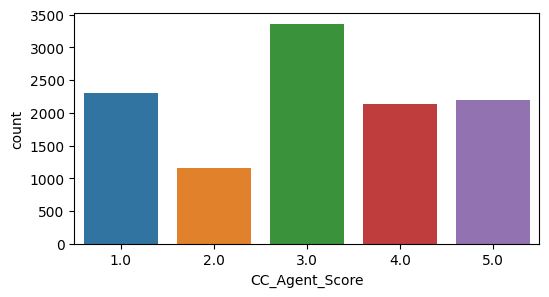

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x=df["CC_Agent_Score"]);

In [ ]:
df["CC_Agent_Score"].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

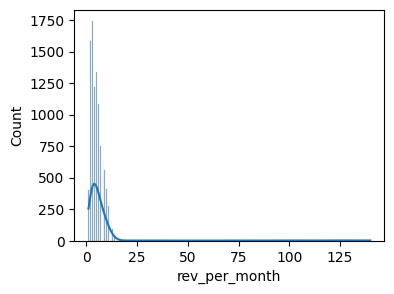

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(x=df["rev_per_month"],kde=True);

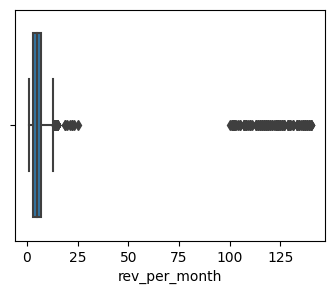

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["rev_per_month"]);

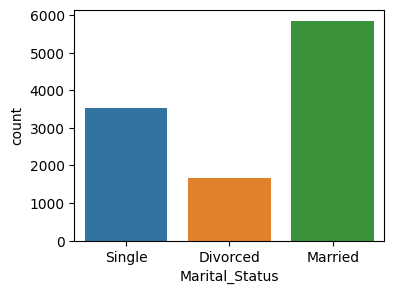

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Marital_Status"]);

In [ ]:
df["Marital_Status"].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

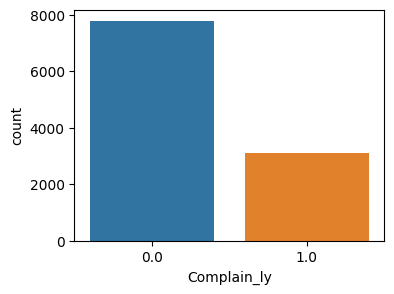

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Complain_ly"]);

In [ ]:
df["Complain_ly"].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

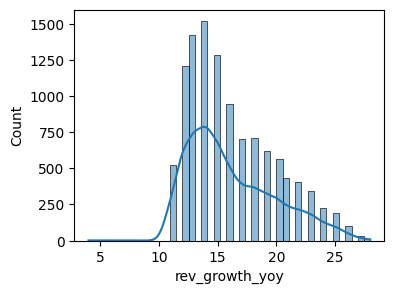

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(x=df["rev_growth_yoy"],kde=True);

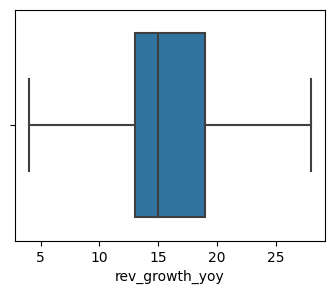

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["rev_growth_yoy"]);

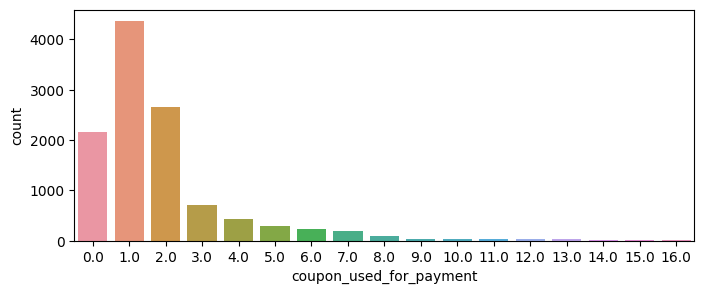

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(x=df["coupon_used_for_payment"]);

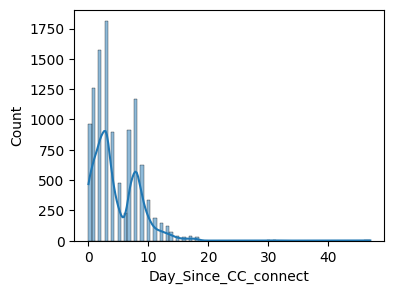

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(x=df["Day_Since_CC_connect"],kde=True);

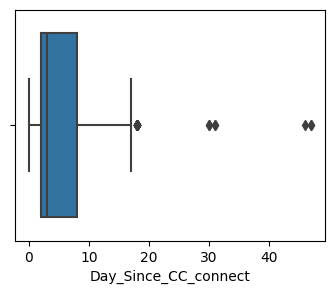

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Day_Since_CC_connect"]);

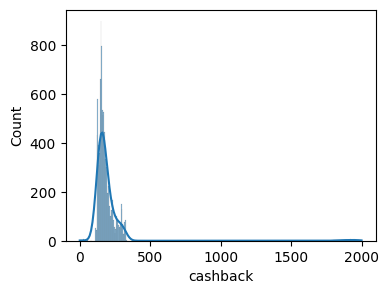

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(x=df["cashback"],kde=True);

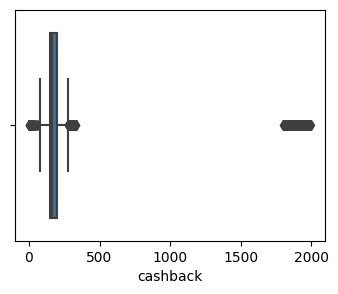

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["cashback"]);

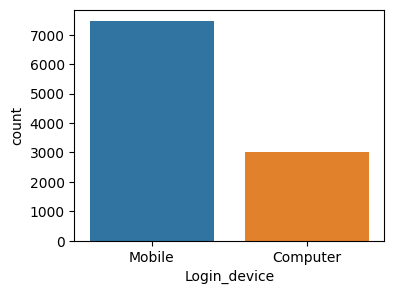

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Login_device"]);

In [ ]:
df["Login_device"].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

#Insights from univariate analysis:
* There are 83.16% of accounts which are not churned and 16.83% accounts of total accounts who are churned.
* Tenure variable is extremely right skewed and has outliers.
* 64.5% of total account holders are from tier 1 city, 30.2% of total account holders are from tier 3 and only 4.2% of total account holders are from tier 2.
* CC_contacted_ly is right skewed and has outliers.
* 40.7% of total transactions are made through Debit card, 31.1% through credit card, 10.8% through E wallet, 9% were made through cash on delivery and 7.3% being the least were made through UPI transactions.
* 59.5% of the account holders are male and 39.5% of the account holders are females.
* 48.7% of account holders has given 3 as service score which is just above average followed by 28.8% of account holders has given 2 as service score which is just below average, 20.8% of account holders have given 4 which is closest to the best service score, o being the least score 0.07% of account holders have given it and the highest service score 5 is only given by 0.044% of the total account holders.
* 40.5% of the total accounts are tagged with 4 customers followed by 28.9% accounts are tagged with 3 customers, 15% of total accounts with 5 customers, 4.6% with 2 customers, 3.9% with 1 customer and the least 2.7% with highest 6 number of customers.
* 36.62% of the total accounts have Super as segment type, 36.07% of the total accounts have Regular plus as segment type, 14.5% of the total accounts have HNI as segment type, 7.26% of the total accounts have Super plus as segment type and the least is Regular type of segment with 4.61% of the total accounts
* 29.8% of the accounts holders gave a satisfaction score of 3, followed by 20.44% as 1, 19.45% as 5, 18.89% as 4 and 10.33% of account holders have given a score of 2.
* Monthly average revenue generated by accounts in last 12 months, which is a right skewed and has outliers.
* 52.04% of the account holders are married, 31.26% are single and 14.81% are divorced.
* 69.2% of the accounts holders haven’t raised any complaints in last year and 27.6% have raised complaints.
* rev_growth_yoy is normally distributed.
* Maximum customers used less number of coupons to do the payments.
* Days_since_cc_connect is right skewed and has outliers.
* Cashback variable is right skewed and has outliers
* 66.4% of the account holders prefer mobile as login device and 26.8% prefer computer as login device.

#Bivariate analysis

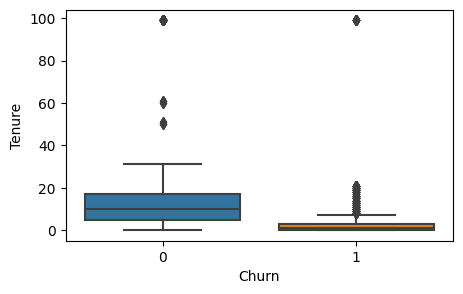

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(y=df["Tenure"],x=df["Churn"]);

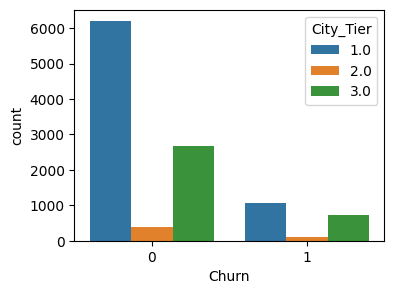

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["City_Tier"],x=df["Churn"]);

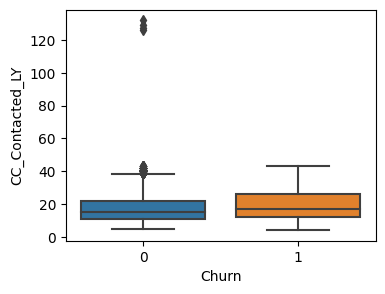

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df["CC_Contacted_LY"],x=df["Churn"]);

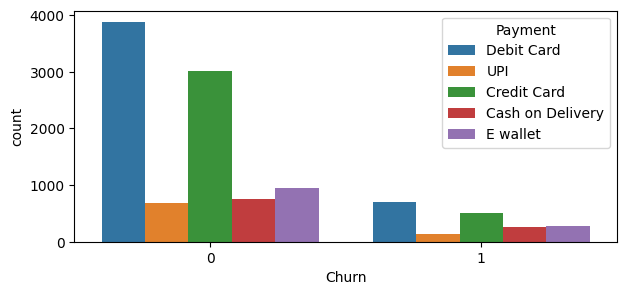

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(hue=df["Payment"],x=df["Churn"]);

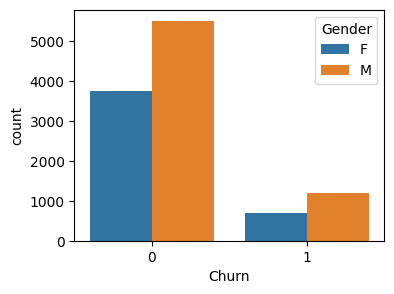

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Gender"],x=df["Churn"]);

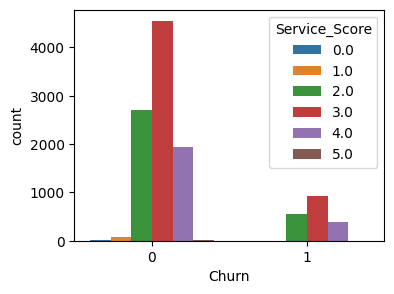

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Service_Score"],x=df["Churn"]);

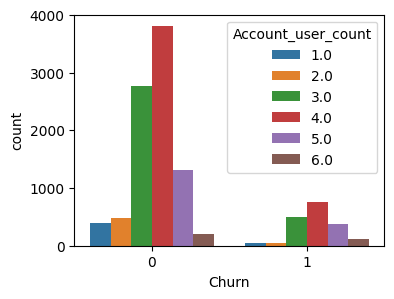

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Account_user_count"],x=df["Churn"]);

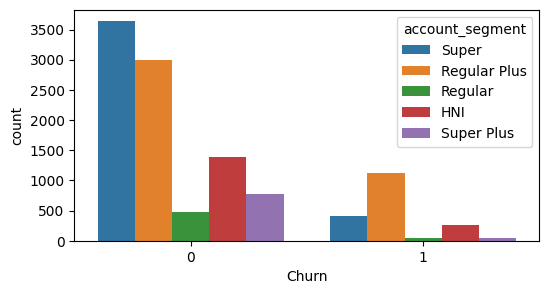

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(hue=df["account_segment"],x=df["Churn"]);

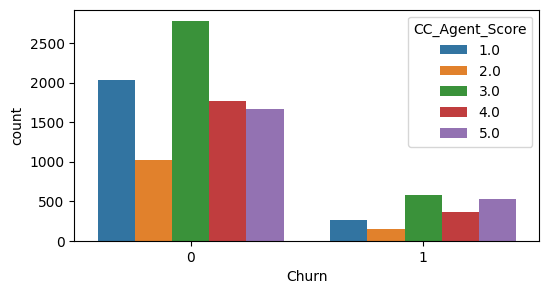

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(hue=df["CC_Agent_Score"],x=df["Churn"]);

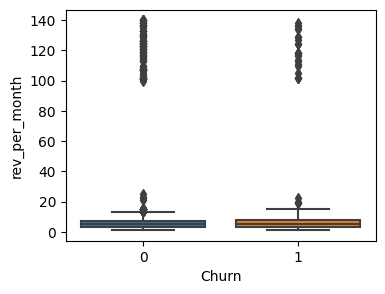

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df["rev_per_month"],x=df["Churn"]);

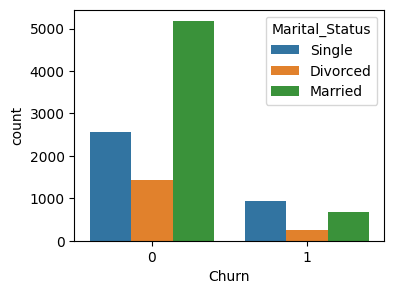

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Marital_Status"],x=df["Churn"]);

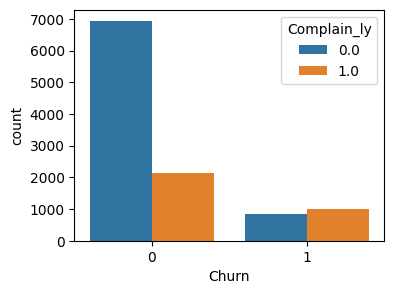

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Complain_ly"],x=df["Churn"]);

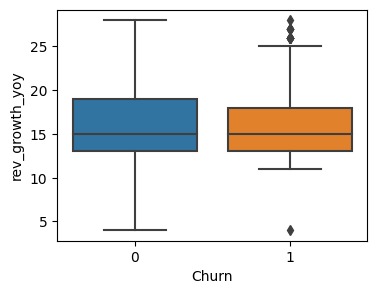

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df["rev_growth_yoy"],x=df["Churn"]);

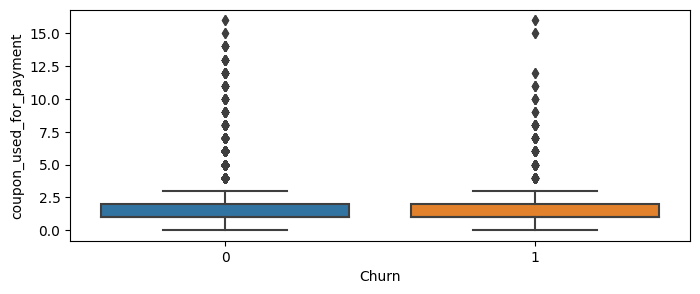

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(y=df["coupon_used_for_payment"],x=df["Churn"]);

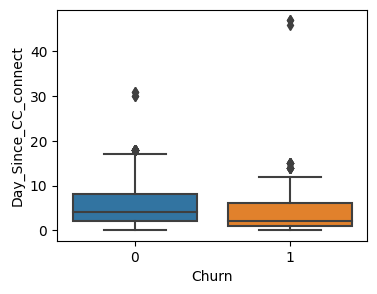

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df["Day_Since_CC_connect"],x=df["Churn"]);

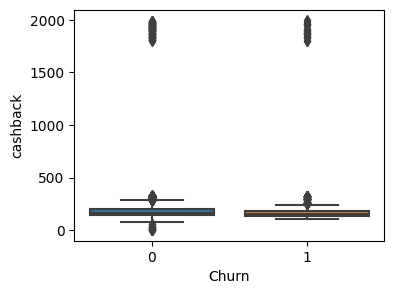

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df["cashback"],x=df["Churn"]);

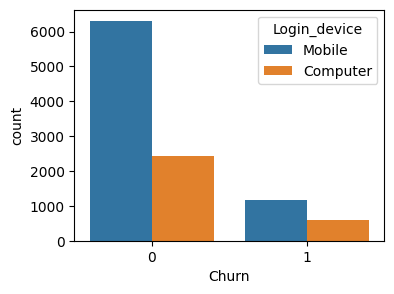

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(hue=df["Login_device"],x=df["Churn"]);

#Insights from Bivariate analysis:
* accounts with less tenure are more likely to churn, than the accounts which have much tenure.
* Primary customers coming from city tier 1 are more likely to be churned than any other customers followed by tier 3.
* customers who contacted customer care less number of time are more likely to churn.
* account holders using payment method as Debit card are likely to be churned more; those who use UPI transactions are less likely to be churned.
* account holders who gave service as 0, 1 and 5 haven’t churned. Customers who gave 3 are more likely to be churned.
* account holders who are male are more likely to ne churned than females.
* accounts which are used by 4 customers are likely churn more than any other and accounts having 1 and 2 customers are less likely to be churned.
* Super segment type of account is less likely to be churned when compared to Regular type although the accounts holders of type super are more. Super plus and regular type segment accounts are less likely to be churned.
* account of the customers who gave satisfaction score for customer care of the company as 3 are more likely to be churned followed by 5. Satisfaction score given as 2 are very less likely to be churned.
* monthly average revenue generated by the account in the last 12 months doesn’t affect churning much.
* Account whose primary customers are single is more likely to churn whereas whose primary customers marital status is divorced are less likely to churn.
* complaints raised by the primary customers don’t affect churning of the account much.
* revenue growth percentage of the account doesn’t affect churning much.
* using coupon for payment doesn’t affect churning much.
* if there is more days for contact between customer and customer care accounts are likely to churn more.
* monthly average cashback generated by account since last 12 months does affect churning.
* customers whose preferred login device is mobile are more likely to churn.

<Axes: >

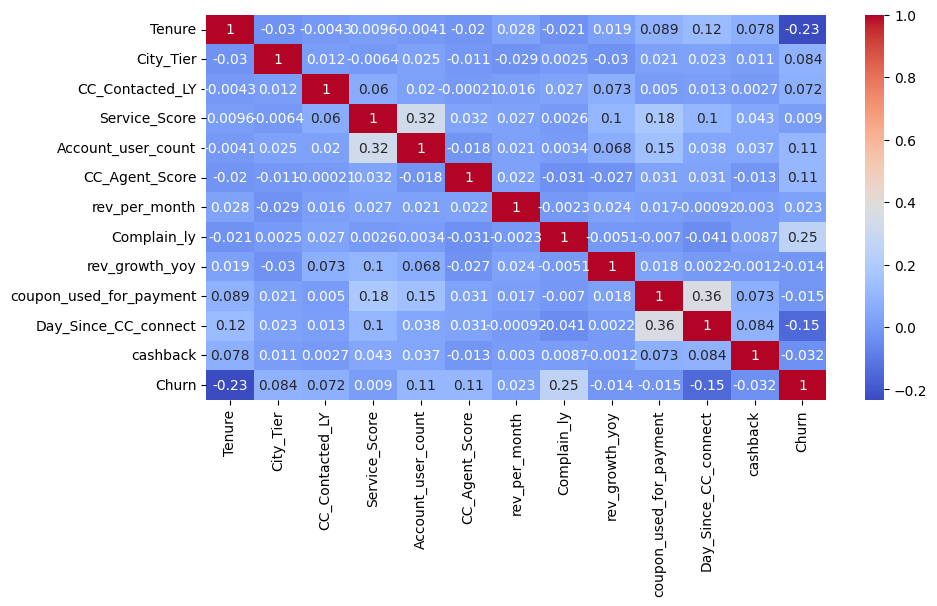

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df[["Tenure","City_Tier","CC_Contacted_LY","Service_Score","Account_user_count",
                     "CC_Agent_Score","rev_per_month","Complain_ly","rev_growth_yoy","coupon_used_for_payment",
                     "Day_Since_CC_connect","cashback","Churn"]].corr(),cmap="coolwarm",cbar=True,annot=True)

#Insights from heatmap:

there is negative correlation between Churn and tenure and also between Churn and Days since cc connect.

#Data preprocessing:
* City_tier, Service_score, CC_agent_score, Complain_ly,Account_user_count are converted into object datatype.
* Missing Value Treatment: Missing values are treated using mode for categorical variables and median values for integer/float type of variables.
* Outliers:Outliers are identified using box plots and are treated for model building as some of the models built are affected by outliers.


In [ ]:
df["City_Tier"]=df["City_Tier"].astype("object")
df["Service_Score"]=df["Service_Score"].astype("object")
df["CC_Agent_Score"]=df["CC_Agent_Score"].astype("object")
df["Complain_ly"]=df["Complain_ly"].astype("object")
df["Account_user_count"]=df["Account_user_count"].astype("object")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

#d) Missing Value treatment (if applicable)

In [ ]:
for col in df.columns:
  null_pc=round(np.mean(df[col].isnull()),3)
  print("{} - {}%".format(col,null_pc))

Churn - 0.0%
Tenure - 0.019%
City_Tier - 0.01%
CC_Contacted_LY - 0.009%
Payment - 0.01%
Gender - 0.01%
Service_Score - 0.009%
Account_user_count - 0.039%
account_segment - 0.009%
CC_Agent_Score - 0.01%
Marital_Status - 0.019%
rev_per_month - 0.07%
Complain_ly - 0.032%
rev_growth_yoy - 0.0%
coupon_used_for_payment - 0.0%
Day_Since_CC_connect - 0.032%
cashback - 0.042%
Login_device - 0.067%


In [ ]:
for column in df.columns:
  if df[column].dtype=="object":
    df[column].fillna(df[column].mode()[0],inplace=True)
  else:
    df[column].fillna(df[column].median(),inplace=True)

In [ ]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

#d) Outlier treatment

In [ ]:
df1=df[["Tenure","CC_Contacted_LY","rev_per_month","rev_growth_yoy","coupon_used_for_payment","Day_Since_CC_connect","cashback"]]
feature_list=df1.columns

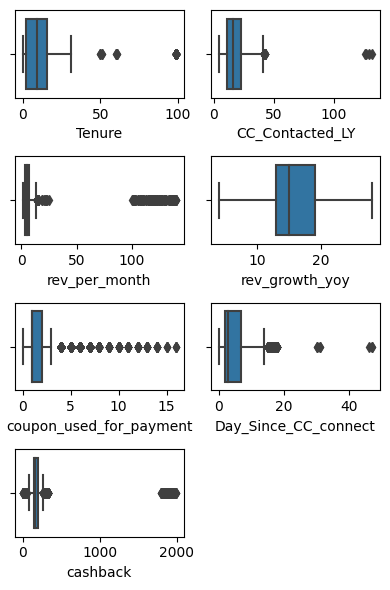

In [ ]:
plt.figure(figsize=(4,6))
for i in range(len(feature_list)):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df[feature_list[i]])
  plt.tight_layout()



In [ ]:
def treat_outlier(col):
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
for i in feature_list:
  ll,ul=treat_outlier(df[i])
  df[i]=np.where(df[i]<ll,ll,df[i])
  df[i]=np.where(df[i]>ul,ul,df[i])

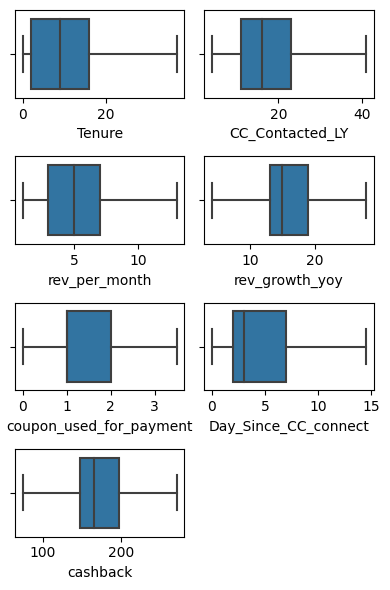

In [ ]:
plt.figure(figsize=(4,6))
for i in range(len(feature_list)):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df[feature_list[i]])
  plt.tight_layout()

In [ ]:
df["Payment"]=df["Payment"].astype("category")
df["account_segment"]=df["account_segment"].astype("category")
df["Marital_Status"]=df["Marital_Status"].astype("category")

#Label encoding:
Label encoding is done for discrete variables.
Gender and Login_device variables are encoded using one hot encoding

In [ ]:
df["Payment"].value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [ ]:
df["account_segment"].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [ ]:
df["Payment"]=df["Payment"].cat.codes
df["Payment"].value_counts()

2    4696
1    3511
3    1217
0    1014
4     822
Name: Payment, dtype: int64

In [ ]:
df["account_segment"]=np.where(df["account_segment"]=="HNI",0,df["account_segment"])
df["account_segment"]=np.where(df["account_segment"]=="Super Plus",1,df["account_segment"])
df["account_segment"]=np.where(df["account_segment"]=="Super",2,df["account_segment"])
df["account_segment"]=np.where(df["account_segment"]=="Regular Plus",3,df["account_segment"])
df["account_segment"]=np.where(df["account_segment"]=="Regular",4,df["account_segment"])

In [ ]:
df["Marital_Status"]=df["Marital_Status"].cat.codes
df["Marital_Status"].value_counts()

1    6072
2    3520
0    1668
Name: Marital_Status, dtype: int64

In [ ]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,F,3.0,3.0,2,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,4,M,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,2,M,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,Mobile
3,1,0.0,3.0,15.0,2,M,2.0,4.0,2,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,1,M,2.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [ ]:
df_new=pd.get_dummies(data=df,columns=["Gender","Login_device"],drop_first=True)
df_new.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Gender_M,Login_device_Mobile
0,1,4.0,3.0,6.0,2,3.0,3.0,2,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,0,1
1,1,0.0,1.0,8.0,4,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1,1
2,1,0.0,1.0,30.0,2,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,1,1
3,1,0.0,3.0,15.0,2,2.0,4.0,2,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1,1
4,1,0.0,1.0,12.0,1,2.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1,1


#Data set is split into training and test set

In [ ]:
x=df_new.drop(["Churn"],axis=1)
y=df_new["Churn"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Gender_M,Login_device_Mobile
2122,0.0,1.0,16.0,2,2.0,4.0,3,5.0,2,2.0,0.0,13.0,0.0,0.0,114.16,0,1
8915,21.0,1.0,11.0,2,3.0,4.0,4,4.0,2,9.0,1.0,14.0,3.5,9.0,271.44,1,1
9448,10.0,1.0,19.0,2,4.0,2.0,3,5.0,1,5.0,1.0,14.0,2.0,3.0,184.62,1,0
239,10.0,1.0,16.0,1,3.0,3.0,3,5.0,0,7.0,0.0,20.0,1.0,3.0,134.52,0,1
4962,7.0,3.0,14.0,2,2.0,4.0,2,4.0,1,2.0,0.0,18.0,1.0,3.0,168.02,0,0


In [ ]:
x_test.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Gender_M,Login_device_Mobile
784,0.0,1.0,31.0,2,2.0,1.0,3,2.0,2,2.0,1.0,12.0,1.0,1.0,129.94,0,1
6943,0.0,3.0,22.0,3,2.0,3.0,3,5.0,1,5.0,0.0,20.0,1.0,0.0,119.90,1,0
3709,10.0,3.0,23.0,3,4.0,5.0,2,5.0,0,6.0,0.0,14.0,2.0,3.0,181.47,0,1
6439,0.0,1.0,10.0,1,2.0,3.0,3,4.0,2,4.0,0.0,19.0,1.0,1.0,120.96,0,1
5310,9.0,1.0,25.0,2,3.0,2.0,2,5.0,1,3.0,0.0,12.0,2.0,11.0,177.08,1,1


In [ ]:
y_train.head()

2122    1
8915    1
9448    0
239     0
4962    0
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts()

0    7023
1    1422
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

0    2341
1     474
Name: Churn, dtype: int64

In [ ]:
y_test.head()

784     0
6943    1
3709    0
6439    0
5310    0
Name: Churn, dtype: int64

#SMOTE
As the data in the dependent variable is unbalanced.
Using SMOTE technique minority class which is 1 is balanced in the training set for model building

In [ ]:
sm=SMOTE(random_state=1)

In [ ]:
y_train.value_counts()

0    7023
1    1422
Name: Churn, dtype: int64

In [ ]:
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [ ]:
y_train_res.value_counts()

1    7023
0    7023
Name: Churn, dtype: int64

# Logistic Regression

In [ ]:
LR=LogisticRegression()

In [ ]:
model_LR1=LR.fit(x_train_res,y_train_res)

In [ ]:
y_train_LR1=model_LR1.predict(x_train_res)
y_test_LR1=model_LR1.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_train_LR1))
print(classification_report(y_train_res,y_train_LR1))

[[5432 1591]
 [1236 5787]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7023
           1       0.78      0.82      0.80      7023

    accuracy                           0.80     14046
   macro avg       0.80      0.80      0.80     14046
weighted avg       0.80      0.80      0.80     14046



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train_res,y_train_LR1).ravel()
tn,fp,fn,tp

(5432, 1591, 1236, 5787)

In [ ]:
print(confusion_matrix(y_test,y_test_LR1))
print(classification_report(y_test,y_test_LR1))

[[1814  527]
 [ 117  357]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2341
           1       0.40      0.75      0.53       474

    accuracy                           0.77      2815
   macro avg       0.67      0.76      0.69      2815
weighted avg       0.85      0.77      0.79      2815



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,y_test_LR1).ravel()
tn,fp,fn,tp

(1814, 527, 117, 357)

In [ ]:
y_train_LRS=model_LR1.predict_proba(x_train_res)
y_test_LRS=model_LR1.predict_proba(x_test)

In [ ]:
y_train_LRS=y_train_LRS[:,1]

In [ ]:
y_test_LRS=y_test_LRS[:,1]

0.8701786358116389


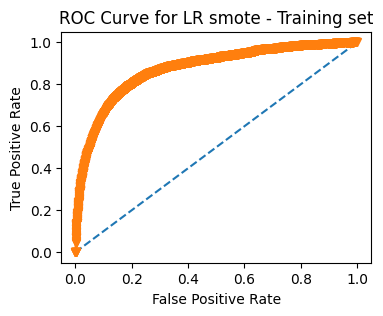

In [ ]:
auc_score_LR1=roc_auc_score(y_train_res,y_train_LRS)
print(auc_score_LR1)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_LRS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LR smote - Training set")
plt.show()

0.8390730637309239


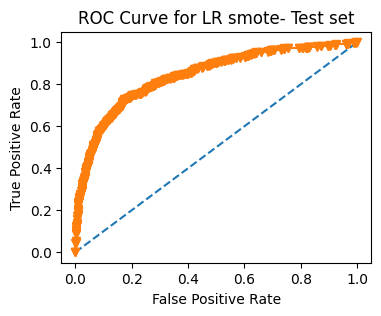

In [ ]:
auc_score_LR1_test=roc_auc_score(y_test,y_test_LRS)
print(auc_score_LR1_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_LRS)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LR smote- Test set")
plt.show()

#Insights from Logistic Regression model:
* It has performed well in terms of recall and accuracy for both train and test set.
* But in terms of precision and f1 score it performed well for training set but didn’t go well for test set.


#Linear Discriminant Analysis

In [ ]:
LDA=LinearDiscriminantAnalysis()

In [ ]:
model_LDA1=LDA.fit(x_train_res,y_train_res)

In [ ]:
y_train_LDA1=model_LDA1.predict(x_train_res)
y_test_LDA1=model_LDA1.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_train_LDA1))
print(classification_report(y_train_res,y_train_LDA1))

[[5379 1644]
 [1106 5917]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7023
           1       0.78      0.84      0.81      7023

    accuracy                           0.80     14046
   macro avg       0.81      0.80      0.80     14046
weighted avg       0.81      0.80      0.80     14046



In [ ]:
print(confusion_matrix(y_test,y_test_LDA1))
print(classification_report(y_test,y_test_LDA1))

[[1779  562]
 [ 102  372]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2341
           1       0.40      0.78      0.53       474

    accuracy                           0.76      2815
   macro avg       0.67      0.77      0.69      2815
weighted avg       0.85      0.76      0.79      2815



In [ ]:
y_train_LDA1=model_LDA1.predict_proba(x_train_res)
y_test_LDA1=model_LDA1.predict_proba(x_test)

In [ ]:
y_train_LDA1=y_train_LDA1[:,1]

In [ ]:
y_test_LDA1=y_test_LDA1[:,1]

0.8746299687917463


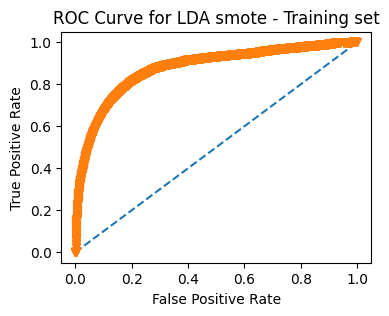

In [ ]:
auc_score_LDA1=roc_auc_score(y_train_res,y_train_LDA1)
print(auc_score_LDA1)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_LDA1)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA smote - Training set")
plt.show()

0.843293374211677


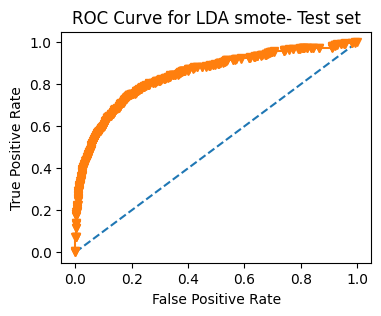

In [ ]:
auc_score_LDA1_test=roc_auc_score(y_test,y_test_LDA1)
print(auc_score_LDA1_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_LDA1)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA smote- Test set")
plt.show()

#Insights from LDA model:
* LDA model performed well in all the metrics for train set but for test set it only performed well in terms of recall and accuracy, it didn’t perform well for precision and recall.

# K Neighbors Classifier

In [ ]:
SS=StandardScaler()
x_trainscaled_sm=SS.fit_transform(x_train_res)
x_testscaled_sm=SS.transform(x_test)

In [ ]:
KNC=KNeighborsClassifier()

In [ ]:
model_KNC1=KNC.fit(x_trainscaled_sm,y_train_res)

In [ ]:
y_train_KNC1=model_KNC1.predict(x_trainscaled_sm)
y_test_KNC1=model_KNC1.predict(x_testscaled_sm)

In [ ]:
print(confusion_matrix(y_train_res,y_train_KNC1))
print(classification_report(y_train_res,y_train_KNC1))

[[6761  262]
 [  45 6978]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      7023
           1       0.96      0.99      0.98      7023

    accuracy                           0.98     14046
   macro avg       0.98      0.98      0.98     14046
weighted avg       0.98      0.98      0.98     14046



In [ ]:
print(confusion_matrix(y_test,y_test_KNC1))
print(classification_report(y_test,y_test_KNC1))

[[2171  170]
 [  19  455]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2341
           1       0.73      0.96      0.83       474

    accuracy                           0.93      2815
   macro avg       0.86      0.94      0.89      2815
weighted avg       0.95      0.93      0.94      2815



In [ ]:
y_train_KN_prob=model_KNC1.predict_proba(x_trainscaled_sm)
y_test_KN_prob=model_KNC1.predict_proba(x_testscaled_sm)

In [ ]:
y_train_KN_prob=y_train_KN_prob[:,1]

In [ ]:
y_test_KN_prob=y_test_KN_prob[:,1]

0.9989278935798284


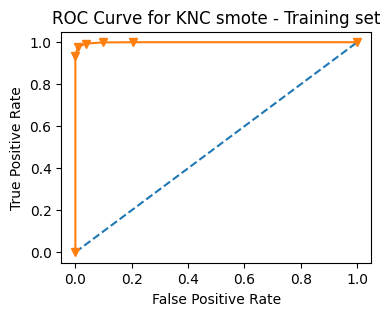

In [ ]:
auc_score_KN=roc_auc_score(y_train_res,y_train_KN_prob)
print(auc_score_KN)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_KN_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNC smote - Training set")
plt.show()

0.9836504649280754


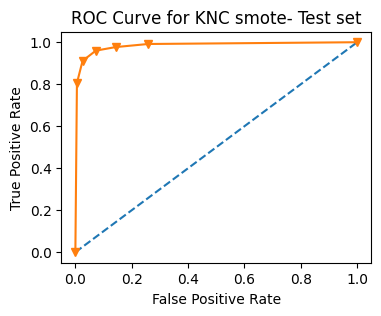

In [ ]:
auc_score_KN_test=roc_auc_score(y_test,y_test_KN_prob)
print(auc_score_KN_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_KN_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNC smote- Test set")
plt.show()

#Insights from K Neighbors Classifier:
* KNC performed well for training set in all the metrics.
* For test set it performed well in terms of recall and accuracy but didn’t go well for both precision and f1 scores.

# Decision Tree Classifier

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
model_DT1=DT.fit(x_train_res,y_train_res)

In [ ]:
y_trainDT1=model_DT1.predict(x_train_res)
y_testDT1=model_DT1.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_trainDT1))
print(classification_report(y_train_res,y_trainDT1))

[[7023    0]
 [   0 7023]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



In [ ]:
print(confusion_matrix(y_test,y_testDT1))
print(classification_report(y_test,y_testDT1))

[[2248   93]
 [  83  391]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.81      0.82      0.82       474

    accuracy                           0.94      2815
   macro avg       0.89      0.89      0.89      2815
weighted avg       0.94      0.94      0.94      2815



In [ ]:
y_train_DT_prob=model_DT1.predict_proba(x_train_res)
y_test_DT_prob=model_DT1.predict_proba(x_test)

In [ ]:
y_train_DT_prob=y_train_DT_prob[:,1]

In [ ]:
y_test_DT_prob=y_test_DT_prob[:,1]

1.0


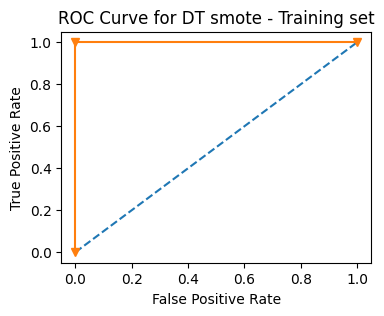

In [ ]:
auc_score_DT=roc_auc_score(y_train_res,y_train_DT_prob)
print(auc_score_DT)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_DT_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DT smote - Training set")
plt.show()

0.8925839511045985


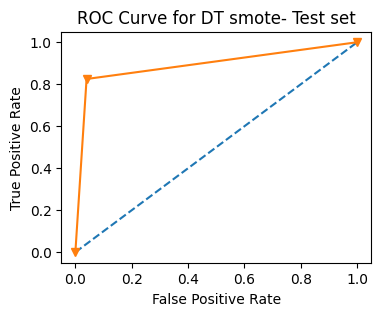

In [ ]:
auc_score_DT_test=roc_auc_score(y_test,y_test_DT_prob)
print(auc_score_DT_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_DT_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DT smote- Test set")
plt.show()

#Insights from Decision Tree Classifier:
* Decision tree model performed very well and has values of 100% for all the performance metrics.
* For test it didn’t go well for all the metrics as it went for training set.


# Random Forest

In [ ]:
RF=RandomForestClassifier()

In [ ]:
model_RF1=RF.fit(x_train_res,y_train_res)

In [ ]:
y_trainRF1=model_RF1.predict(x_train_res)
y_testRF1=model_RF1.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_trainRF1))
print(classification_report(y_train_res,y_trainRF1))

[[7023    0]
 [   0 7023]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



In [ ]:
print(confusion_matrix(y_test,y_testRF1))
print(classification_report(y_test,y_testRF1))

[[2319   22]
 [  56  418]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2341
           1       0.95      0.88      0.91       474

    accuracy                           0.97      2815
   macro avg       0.96      0.94      0.95      2815
weighted avg       0.97      0.97      0.97      2815



In [ ]:
y_train_RF_prob=model_RF1.predict_proba(x_train_res)
y_test_RF_prob=model_RF1.predict_proba(x_test)

In [ ]:
y_train_RF_prob=y_train_RF_prob[:,1]

In [ ]:
y_test_RF_prob=y_test_RF_prob[:,1]

1.0


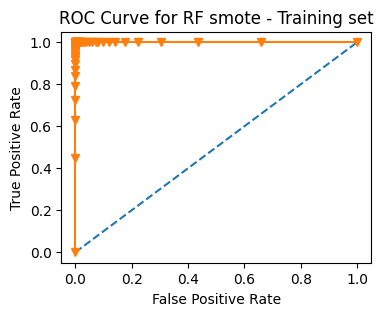

In [ ]:
auc_score_RF1=roc_auc_score(y_train_res,y_train_RF_prob)
print(auc_score_RF1)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_RF_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RF smote - Training set")
plt.show()

0.9917576426100859


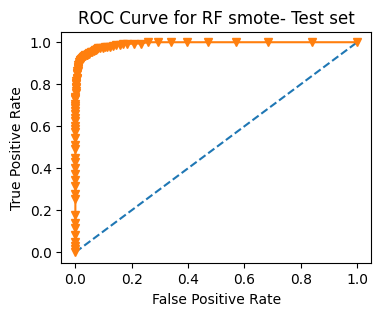

In [ ]:
auc_score_RF_test=roc_auc_score(y_test,y_test_RF_prob)
print(auc_score_RF_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_RF_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RF smote- Test set")
plt.show()

#Insights from Random Forest Classifier:
* Random Forest model perfomed very well on training set with 100% performance.
For test set, it didn’t do well in terms of all the metrics.


#Hyper parameter tuning:
Hyper parameter tuning is done by using GridSearchCV to improve the performance of the models.

#Logistic Regression

In [ ]:
solvers=["newton-cg","lbfgs","liblinear","saga"]
penalty=["l2",None]
c_values=[100,10,1.0,0.1,0.01]
grid=dict(solver=solvers,penalty=penalty,C=c_values)

In [ ]:
gs=GridSearchCV(estimator=LR,param_grid=grid,n_jobs=-1)

In [ ]:
gs.fit(x_train_res,y_train_res)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']})

In [ ]:
gs.cv_results_["params"]

[{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 100, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 100, 'penalty': None, 'solver': 'newton-cg'},
 {'C': 100, 'penalty': None, 'solver': 'lbfgs'},
 {'C': 100, 'penalty': None, 'solver': 'liblinear'},
 {'C': 100, 'penalty': None, 'solver': 'saga'},
 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 10, 'penalty': 'l2', 'solver': 'saga'},
 {'C': 10, 'penalty': None, 'solver': 'newton-cg'},
 {'C': 10, 'penalty': None, 'solver': 'lbfgs'},
 {'C': 10, 'penalty': None, 'solver': 'liblinear'},
 {'C': 10, 'penalty': None, 'solver': 'saga'},
 {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'},
 {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'},
 {'C': 1.0, 'penalty': 'l2', 'solver': 's

In [ ]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lg=LogisticRegression(C=0.1,penalty="l2",solver="newton-cg")
modelLG=lg.fit(x_train_res,y_train_res)
ytrain_predictLG=modelLG.predict(x_train_res)
ytest_predictLG=modelLG.predict(x_test)
print(confusion_matrix(y_train_res,ytrain_predictLG))
print(classification_report(y_train_res,ytrain_predictLG))

[[5494 1529]
 [1165 5858]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7023
           1       0.79      0.83      0.81      7023

    accuracy                           0.81     14046
   macro avg       0.81      0.81      0.81     14046
weighted avg       0.81      0.81      0.81     14046



In [ ]:
print(confusion_matrix(y_test,ytest_predictLG))
print(classification_report(y_test,ytest_predictLG))

[[1835  506]
 [ 104  370]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2341
           1       0.42      0.78      0.55       474

    accuracy                           0.78      2815
   macro avg       0.68      0.78      0.70      2815
weighted avg       0.86      0.78      0.81      2815



In [ ]:
y_train_probLG=modelLG.predict_proba(x_train_res)
y_test_probLG=modelLG.predict_proba(x_test)

In [ ]:
y_train_probLG=y_train_probLG[:,1]

In [ ]:
y_test_probLG=y_test_probLG[:,1]

0.8764960734272162


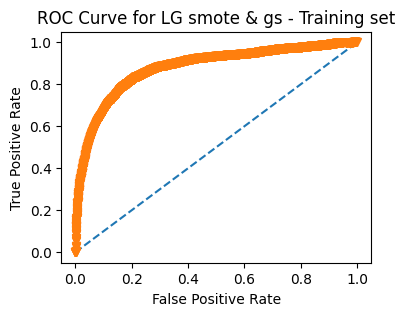

In [ ]:
auc_score_LG_GS=roc_auc_score(y_train_res,y_train_probLG)
print(auc_score_LG_GS)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_probLG)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LG smote & gs - Training set")
plt.show()

0.8465980674708959


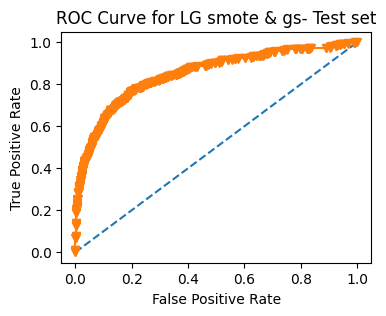

In [ ]:
auc_score_LG_gs_test=roc_auc_score(y_test,y_test_probLG)
print(auc_score_LG_gs_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_probLG)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LG smote & gs- Test set")
plt.show()

#Insighst from Logistic Regression:
* Best parameters obtained for Logistic Regression after using Grid Search CV are C=0.1, Penalty=l2 and solver: newton-cg
* After hyper parameter tuning,
Recall and accuracy values are increased by 1% and precision and f1 score are decreased by 1% for training set.
For test set, all the performance metrics were increased by 2%.
Model is overfitting on training and it is underfittin on test set.

#Linear Discriminant analysis

In [ ]:
model=LinearDiscriminantAnalysis()
solver=["lsqr","eigen"]
shrikage=["auto",0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid=dict(solver=solver,shrinkage=shrikage)

In [ ]:
gs1=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv)

In [ ]:
gs1.fit(x_train_res,y_train_res)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                       0.7, 0.8, 0.9],
                         'solver': ['lsqr', 'eigen']})

In [ ]:
gs1.cv_results_["params"]

[{'shrinkage': 'auto', 'solver': 'lsqr'},
 {'shrinkage': 'auto', 'solver': 'eigen'},
 {'shrinkage': 0.1, 'solver': 'lsqr'},
 {'shrinkage': 0.1, 'solver': 'eigen'},
 {'shrinkage': 0.2, 'solver': 'lsqr'},
 {'shrinkage': 0.2, 'solver': 'eigen'},
 {'shrinkage': 0.3, 'solver': 'lsqr'},
 {'shrinkage': 0.3, 'solver': 'eigen'},
 {'shrinkage': 0.4, 'solver': 'lsqr'},
 {'shrinkage': 0.4, 'solver': 'eigen'},
 {'shrinkage': 0.5, 'solver': 'lsqr'},
 {'shrinkage': 0.5, 'solver': 'eigen'},
 {'shrinkage': 0.6, 'solver': 'lsqr'},
 {'shrinkage': 0.6, 'solver': 'eigen'},
 {'shrinkage': 0.7, 'solver': 'lsqr'},
 {'shrinkage': 0.7, 'solver': 'eigen'},
 {'shrinkage': 0.8, 'solver': 'lsqr'},
 {'shrinkage': 0.8, 'solver': 'eigen'},
 {'shrinkage': 0.9, 'solver': 'lsqr'},
 {'shrinkage': 0.9, 'solver': 'eigen'}]

In [ ]:
gs1.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [ ]:
LDA1=LinearDiscriminantAnalysis(solver="lsqr",shrinkage="auto")
modelLDA=LDA.fit(x_train_res,y_train_res)
ytrain_predictLDA=modelLDA.predict(x_train_res)
ytest_predictLDA=modelLDA.predict(x_test)
print(confusion_matrix(y_train_res,ytrain_predictLDA))
print(classification_report(y_train_res,ytrain_predictLDA))

[[5379 1644]
 [1106 5917]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7023
           1       0.78      0.84      0.81      7023

    accuracy                           0.80     14046
   macro avg       0.81      0.80      0.80     14046
weighted avg       0.81      0.80      0.80     14046



In [ ]:
print(confusion_matrix(y_test,ytest_predictLDA))
print(classification_report(y_test,ytest_predictLDA))

[[1779  562]
 [ 102  372]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2341
           1       0.40      0.78      0.53       474

    accuracy                           0.76      2815
   macro avg       0.67      0.77      0.69      2815
weighted avg       0.85      0.76      0.79      2815



In [ ]:
y_train_LDA_prob=modelLDA.predict_proba(x_train_res)
y_test_LDA_prob=modelLDA.predict_proba(x_test)

In [ ]:
y_train_LDA_prob=y_train_LDA_prob[:,1]

In [ ]:
y_test_LDA_prob=y_test_LDA_prob[:,1]

0.8746299687917463


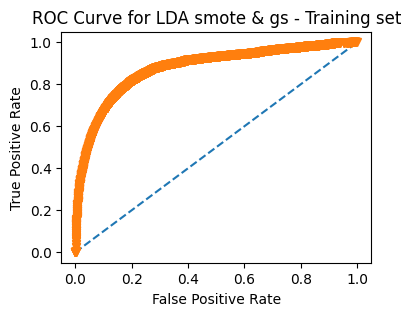

In [ ]:
auc_score_LDA_GS=roc_auc_score(y_train_res,y_train_LDA_prob)
print(auc_score_LDA_GS)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_LDA_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA smote & gs - Training set")
plt.show()

0.843293374211677


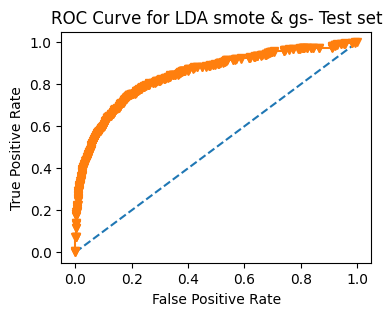

In [ ]:
auc_score_LDA_gs_test=roc_auc_score(y_test,y_test_LDA_prob)
print(auc_score_LDA_gs_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_LDA_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA smote & gs- Test set")
plt.show()

#Insights from Linear Discriminant Analysis:
Best parameters obtained for Linear Discriminant Analysis after using GridSearchCV are shrinkage: auto and solver: lsqr
After hyper parameter tuning,
the performance metrics of LDA model has not improved, the model is overfitting for training and underfitting for test set.

# K Neighbors CLassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid={"n_neighbors": list(range(1,9)),
            "weights":("uniform","distance"),
            "metric": ("minkowski","euclidean","manhattan")}
gs2=GridSearchCV(knn,param_grid,cv=10)
gs2.fit(x_trainscaled_sm,y_train_res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                         'weights': ('uniform', 'distance')})

In [ ]:
gs2.cv_results_["params"]

[{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'},
 {'

In [ ]:
gs2.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
KNN=KNeighborsClassifier(metric="manhattan",n_neighbors=1,weights="uniform")
model_KNN=KNN.fit(x_trainscaled_sm,y_train_res)
ytrain_predictKNN=model_KNN.predict(x_trainscaled_sm)
ytest_predictKNN=model_KNN.predict(x_testscaled_sm)
print(confusion_matrix(y_train_res,ytrain_predictKNN))
print(classification_report(y_train_res,ytrain_predictKNN))

[[7023    0]
 [   0 7023]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



In [ ]:
print(confusion_matrix(y_test,ytest_predictKNN))
print(classification_report(y_test,ytest_predictKNN))

[[2319   22]
 [   8  466]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2341
           1       0.95      0.98      0.97       474

    accuracy                           0.99      2815
   macro avg       0.98      0.99      0.98      2815
weighted avg       0.99      0.99      0.99      2815



In [ ]:
y_train_KN_prob=model_KNN.predict_proba(x_trainscaled_sm)
y_test_KN_prob=model_KNN.predict_proba(x_testscaled_sm)

In [ ]:
y_train_KN_prob=y_train_KN_prob[:,1]

In [ ]:
y_test_KN_prob=y_test_KN_prob[:,1]

1.0


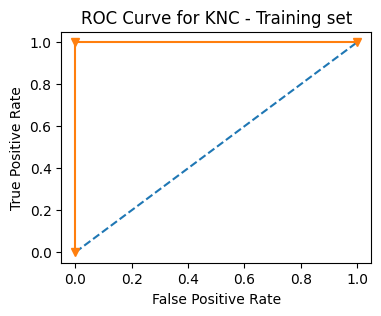

In [ ]:
auc_score_KN=roc_auc_score(y_train_res,y_train_KN_prob)
print(auc_score_KN)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_KN_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNC - Training set")
plt.show()

0.9868623347878671


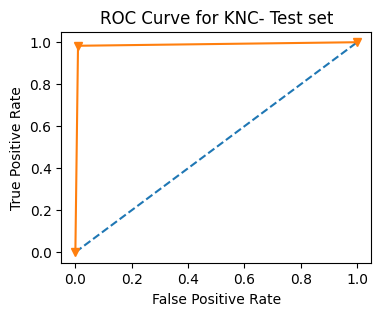

In [ ]:
auc_score_KNtest=roc_auc_score(y_test,y_test_KN_prob)
print(auc_score_KNtest)
fpr,tpr,thresholds=roc_curve(y_test,y_test_KN_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNC- Test set")
plt.show()

#Insights from K Neighbors Classifier:
* Best parameters obtained for K Neighbors Classifier after Using GridSearchCV are metric: manhattan, n_neighbors: 1 and weights: uniform
After hyper parameter tuning, the performance metrics of K Neighbors classifier model for both train and test set has improved.
The model is neither overfitting nor underfitting

#Random Forest

In [ ]:
param_grid={"n_estimators": [25,50,100,150],
            "max_features": ["sqrt","log2",None],
            "max_leaf_nodes" : [3,6,9]}
gs3=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
gs3.fit(x_train_res,y_train_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
gs3.cv_results_["params"]

[{'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 150},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100},
 {'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150},
 {'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 25},
 {'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 50},
 {'max_features': 'log2', 'max_leaf_nodes'

In [ ]:
gs3.best_params_

{'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}

In [ ]:
RF1=RandomForestClassifier(max_features="sqrt",max_leaf_nodes=9,n_estimators=50,random_state=1)
modelrf=RF1.fit(x_train_res,y_train_res)
y_trainrf=modelrf.predict(x_train_res)
y_testrf=modelrf.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_trainrf))
print(classification_report(y_train_res,y_trainrf))

[[5976 1047]
 [1000 6023]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7023
           1       0.85      0.86      0.85      7023

    accuracy                           0.85     14046
   macro avg       0.85      0.85      0.85     14046
weighted avg       0.85      0.85      0.85     14046



In [ ]:
print(confusion_matrix(y_test,y_testrf))
print(classification_report(y_test,y_testrf))

[[2036  305]
 [ 105  369]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2341
           1       0.55      0.78      0.64       474

    accuracy                           0.85      2815
   macro avg       0.75      0.82      0.78      2815
weighted avg       0.88      0.85      0.86      2815



In [ ]:
y_train_RF_prob=modelrf.predict_proba(x_train_res)
y_test_RF_prob=modelrf.predict_proba(x_test)

In [ ]:
y_train_RF_prob=y_train_RF_prob[:,1]

In [ ]:
y_test_RF_prob=y_test_RF_prob[:,1]

0.9295169556289378


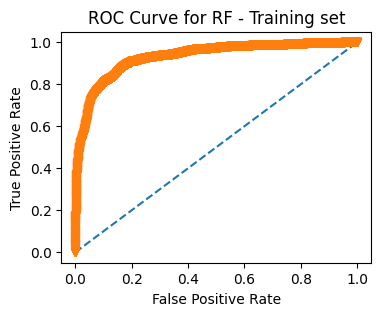

In [ ]:
auc_score_RF=roc_auc_score(y_train_res,y_train_RF_prob)
print(auc_score_RF)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_RF_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RF - Training set")
plt.show()

0.8739904328814726


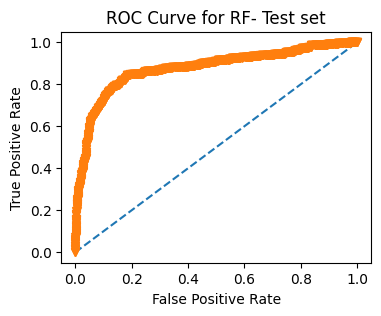

In [ ]:
auc_score_RFtest=roc_auc_score(y_test,y_test_RF_prob)
print(auc_score_RFtest)
fpr,tpr,thresholds=roc_curve(y_test,y_test_RF_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RF- Test set")
plt.show()

#Insights from Random Forest Classifier:
* Best parameters obtained for Random Forest Classifier after using GridSearchCV are max_features: sqrt, max_leaf_nodes: 9 and n_estimators: 50
After hyper parameter tuning, value of all the performance metrics were less when compared with before tuning.
RF model is overfitting for training and underfitting for test set.

#Decision Tree Classifier

In [ ]:
param_grid={"min_samples_leaf":[1,2,3,4,5,6,7,8,9],
            "max_depth":[1,2,3,4,5,6,7,8,9],
            "max_features":["auto","sqrt","log2",None]}
gs4=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
gs4.fit(x_train_res,y_train_res)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gs4.cv_results_["params"]

[{'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 2},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 3},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 4},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 5},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 6},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 7},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 8},
 {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 9},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 2},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 3},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 4},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 5},
 {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 6},
 {'max_dep

In [ ]:
gs4.best_params_

{'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1}

In [ ]:
dt1=DecisionTreeClassifier(max_depth=9,max_features=None,min_samples_leaf=1,random_state=1)
modeldt=dt1.fit(x_train_res,y_train_res)
y_traindt=modeldt.predict(x_train_res)
y_testdt=modeldt.predict(x_test)

In [ ]:
print(confusion_matrix(y_train_res,y_traindt))
print(classification_report(y_train_res,y_traindt))

[[6668  355]
 [ 597 6426]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7023
           1       0.95      0.91      0.93      7023

    accuracy                           0.93     14046
   macro avg       0.93      0.93      0.93     14046
weighted avg       0.93      0.93      0.93     14046



In [ ]:
print(confusion_matrix(y_test,y_testdt))
print(classification_report(y_test,y_testdt))

[[2197  144]
 [ 139  335]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2341
           1       0.70      0.71      0.70       474

    accuracy                           0.90      2815
   macro avg       0.82      0.82      0.82      2815
weighted avg       0.90      0.90      0.90      2815



In [ ]:
y_train_DT_prob=modeldt.predict_proba(x_train_res)
y_test_DT_prob=modeldt.predict_proba(x_test)

In [ ]:
y_train_DT_prob=y_train_DT_prob[:,1]

In [ ]:
y_test_DT_prob=y_test_DT_prob[:,1]

0.9808812115047871


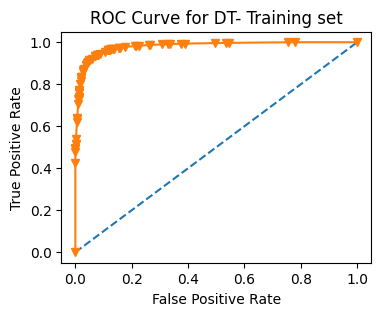

In [ ]:
auc_score_DT=roc_auc_score(y_train_res,y_train_DT_prob)
print(auc_score_DT)
fpr,tpr,thresholds=roc_curve(y_train_res,y_train_DT_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DT- Training set")
plt.show()

0.9040251109825401


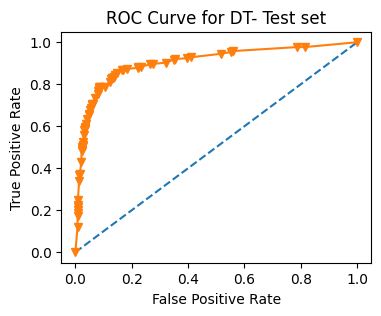

In [ ]:
auc_score_DTtest=roc_auc_score(y_test,y_test_DT_prob)
print(auc_score_DTtest)
fpr,tpr,thresholds=roc_curve(y_test,y_test_DT_prob)
plt.figure(figsize=(4,3))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="v")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for DT- Test set")
plt.show()

#Insights from Decision Tree Classifier:
* Best parameters obtained for Decision Tree Classifier after using GridSearchCV are max_depth: 9, max_features: None and min_samples_leaf:1
After hyper parameter tuning, value of all the performance metrics are less when compared with before tuning values, model is overfitting for training set and underfitting for test set.

In [ ]:
print(pd.DataFrame(dt1.feature_importances_,columns=["Imp"],index=x_train.columns))

                              Imp
Tenure                   0.457163
City_Tier                0.043878
CC_Contacted_LY          0.022923
Payment                  0.010515
Service_Score            0.003397
Account_user_count       0.020860
account_segment          0.035530
CC_Agent_Score           0.056616
Marital_Status           0.005809
rev_per_month            0.035888
Complain_ly              0.194346
rev_growth_yoy           0.029419
coupon_used_for_payment  0.006864
Day_Since_CC_connect     0.034553
cashback                 0.018892
Gender_M                 0.003111
Login_device_Mobile      0.020238


#Interpretation of the models:
* For our business problem class 1 of the target variable churn is the most important class, which indicates customer churn.
* In our Business problem recall is more important, as it focusses more on False Negatives which comes under type 1 error.
* Type 1 error is more important to us because, in actual the customer is churning but our model predicts the customer as not churning, which results in loss of our customer.
* We have to retain our existing customers, as acquiring new customers will cost us more than retaining existing customers.
We have to reduce the False negatives, in order to increase our model performance.
* Recall gives us the ratio of True Positives to True Positives and False negatives.We can increase value of Recall when we decrease False Negative values.
* So, in our problem statement we consider Recall as the most important metrics.

#Best MOdel:
* K Neighbors Classifier is the best model for our business problem.
* KNC model gave good values for all the performance metrics when compared with all the other models used.
Perfromance Metrics for KNC:
Recall for both training and testing set are 100% and 98%, which means K Neighbors classifier after model tuning and built using metric as manhattan, n neighbors as 1 andweghts as uniform is the best model for us.
* In terms of confusion matrix,K Neighbors classifier, has given us more number of True Positives than any other model, less number of False Negatives than any other model, less number of False positives and also high number of True negatives compared to all the others models built.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_new)
cluster_labels = kmeans.labels_

In [ ]:
mean_values = []
mode_values=[]
std_values = []
for i in range(kmeans.n_clusters):
    mean_values.append(df_new[cluster_labels == i].mean())
    mode_values.append(df_new[cluster_labels == i].mode())
    std_values.append(df_new[cluster_labels == i].std())

print(mean_values)

[Churn                        0.230662
Tenure                       7.310805
City_Tier                    1.500000
CC_Contacted_LY             17.409689
Payment                      1.702951
Service_Score                2.750399
Account_user_count           3.531300
account_segment              2.710726
CC_Agent_Score               3.080742
Marital_Status               1.211124
rev_per_month                4.782695
Complain_ly                  0.275319
rev_growth_yoy              16.103070
coupon_used_for_payment      1.169557
Day_Since_CC_connect         3.367026
cashback                   142.174119
Gender_M                     0.617424
Login_device_Mobile          0.723684
dtype: float64, Churn                        0.093229
Tenure                      17.376349
City_Tier                    1.620216
CC_Contacted_LY             17.838567
Payment                      1.758096
Service_Score                2.979392
Account_user_count           3.836605
account_segment              1.54

In [ ]:
print(mode_values)

[   Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Service_Score  \
0      0     0.0        1.0             16.0        2            3.0   

   Account_user_count account_segment  CC_Agent_Score  Marital_Status  \
0                 4.0               3             3.0               1   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            2.0          0.0            14.0                      1.0   

   Day_Since_CC_connect  cashback  Gender_M  Login_device_Mobile  
0                   2.0     73.76         1                    1  ,    Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Service_Score  \
0      0    24.0        1.0             14.0        2            3.0   

   Account_user_count account_segment  CC_Agent_Score  Marital_Status  \
0                 4.0               1             3.0               1   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            5.0          0.0            14.0            

In [ ]:
print(std_values)

[Churn                       0.421298
Tenure                      7.944981
City_Tier                   0.836362
CC_Contacted_LY             8.325352
Payment                     1.013508
Service_Score               0.705130
Account_user_count          1.002200
account_segment             0.467757
CC_Agent_Score              1.362970
Marital_Status              0.662245
rev_per_month               2.809439
Complain_ly                 0.446719
rev_growth_yoy              3.764761
coupon_used_for_payment     1.001847
Day_Since_CC_connect        2.883162
cashback                   13.391371
Gender_M                    0.486064
Login_device_Mobile         0.447219
dtype: float64, Churn                       0.290824
Tenure                      8.508979
City_Tier                   0.900566
CC_Contacted_LY             8.870416
Payment                     0.970285
Service_Score               0.727176
Account_user_count          0.995964
account_segment             1.537177
CC_Agent_Score       

# Business Recommendations:
* If there are any complaints by the account users clear them regularly.
*	Do more promotions and increase advertisements in city tier 1 as there are more customers and also accounts which are churning more.
*	Give some male centric offers to the accounts whose primary customers are male.
*	Provide some cash backs to the customers who make payments through debit card, there are many customers whose chose that payment mode.
*	Look into the issues of customers who gave service scores 2, 3 and 4 and solve their issues regularly.
*	Accounts with 3,4 and 5 users are churning more, look into it if there are any issues for them .
*	Connect with the customers on regular basis and solve their issues regularly, by this company can reduce churn rate.
*	Customers whose account segment as Super tend to churn less, try to find out the reasons behind that and apply it across.
*	Customers with HNI account segment are also churning, focus more on these customers as they give high revenue to the company and increase retention rate.
*	Try to improve cc agent score as it affects churn rate of the account.
*	Focus more on accounts whose primary customers are single and provide them offers.
*	Customers, who are married, are tending to churn less, get to know the reasons behind that and apply it across.
*	Customers with login device as mobile may have some issues as they are churning more, try to solve the issues or make it easy for them use it, so we can reduce the churn rate.
